In [1]:
import scipy.io
import numpy as np
import sys
sys.path.append("..")
from utils import load_files, mean_vilt, get_rdms, get_rdm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
%load_ext autoreload
%autoreload 2

In [2]:
def plot_rdms(axs, data):
    for i, x in enumerate(zip(data.keys(), data.values(), axs.flat)):
        k = x[0]
        v = x[1]
        ax = x[2]
        sns.heatmap(v, ax=ax, cmap='plasma')
        ax.set_title(k, fontsize=30, fontweight='bold')

In [3]:
vilt_multi = load_files("vilt_feats2/multi")
vilt_multi = vilt_multi.reshape(12, 810, int(622080/810))
mean_vilt_layers = mean_vilt(vilt_multi)
svilt_rdms = get_rdms(mean_vilt_layers)

vilt_random_multi = load_files("vilt_feats_random2/multi")
vilt_random_multi = vilt_random_multi.reshape(12, 810, int(622080/810))
mean_random_vilt_layers = mean_vilt(vilt_random_multi, "Random")
svilt_random_rdms = get_rdms(mean_random_vilt_layers)

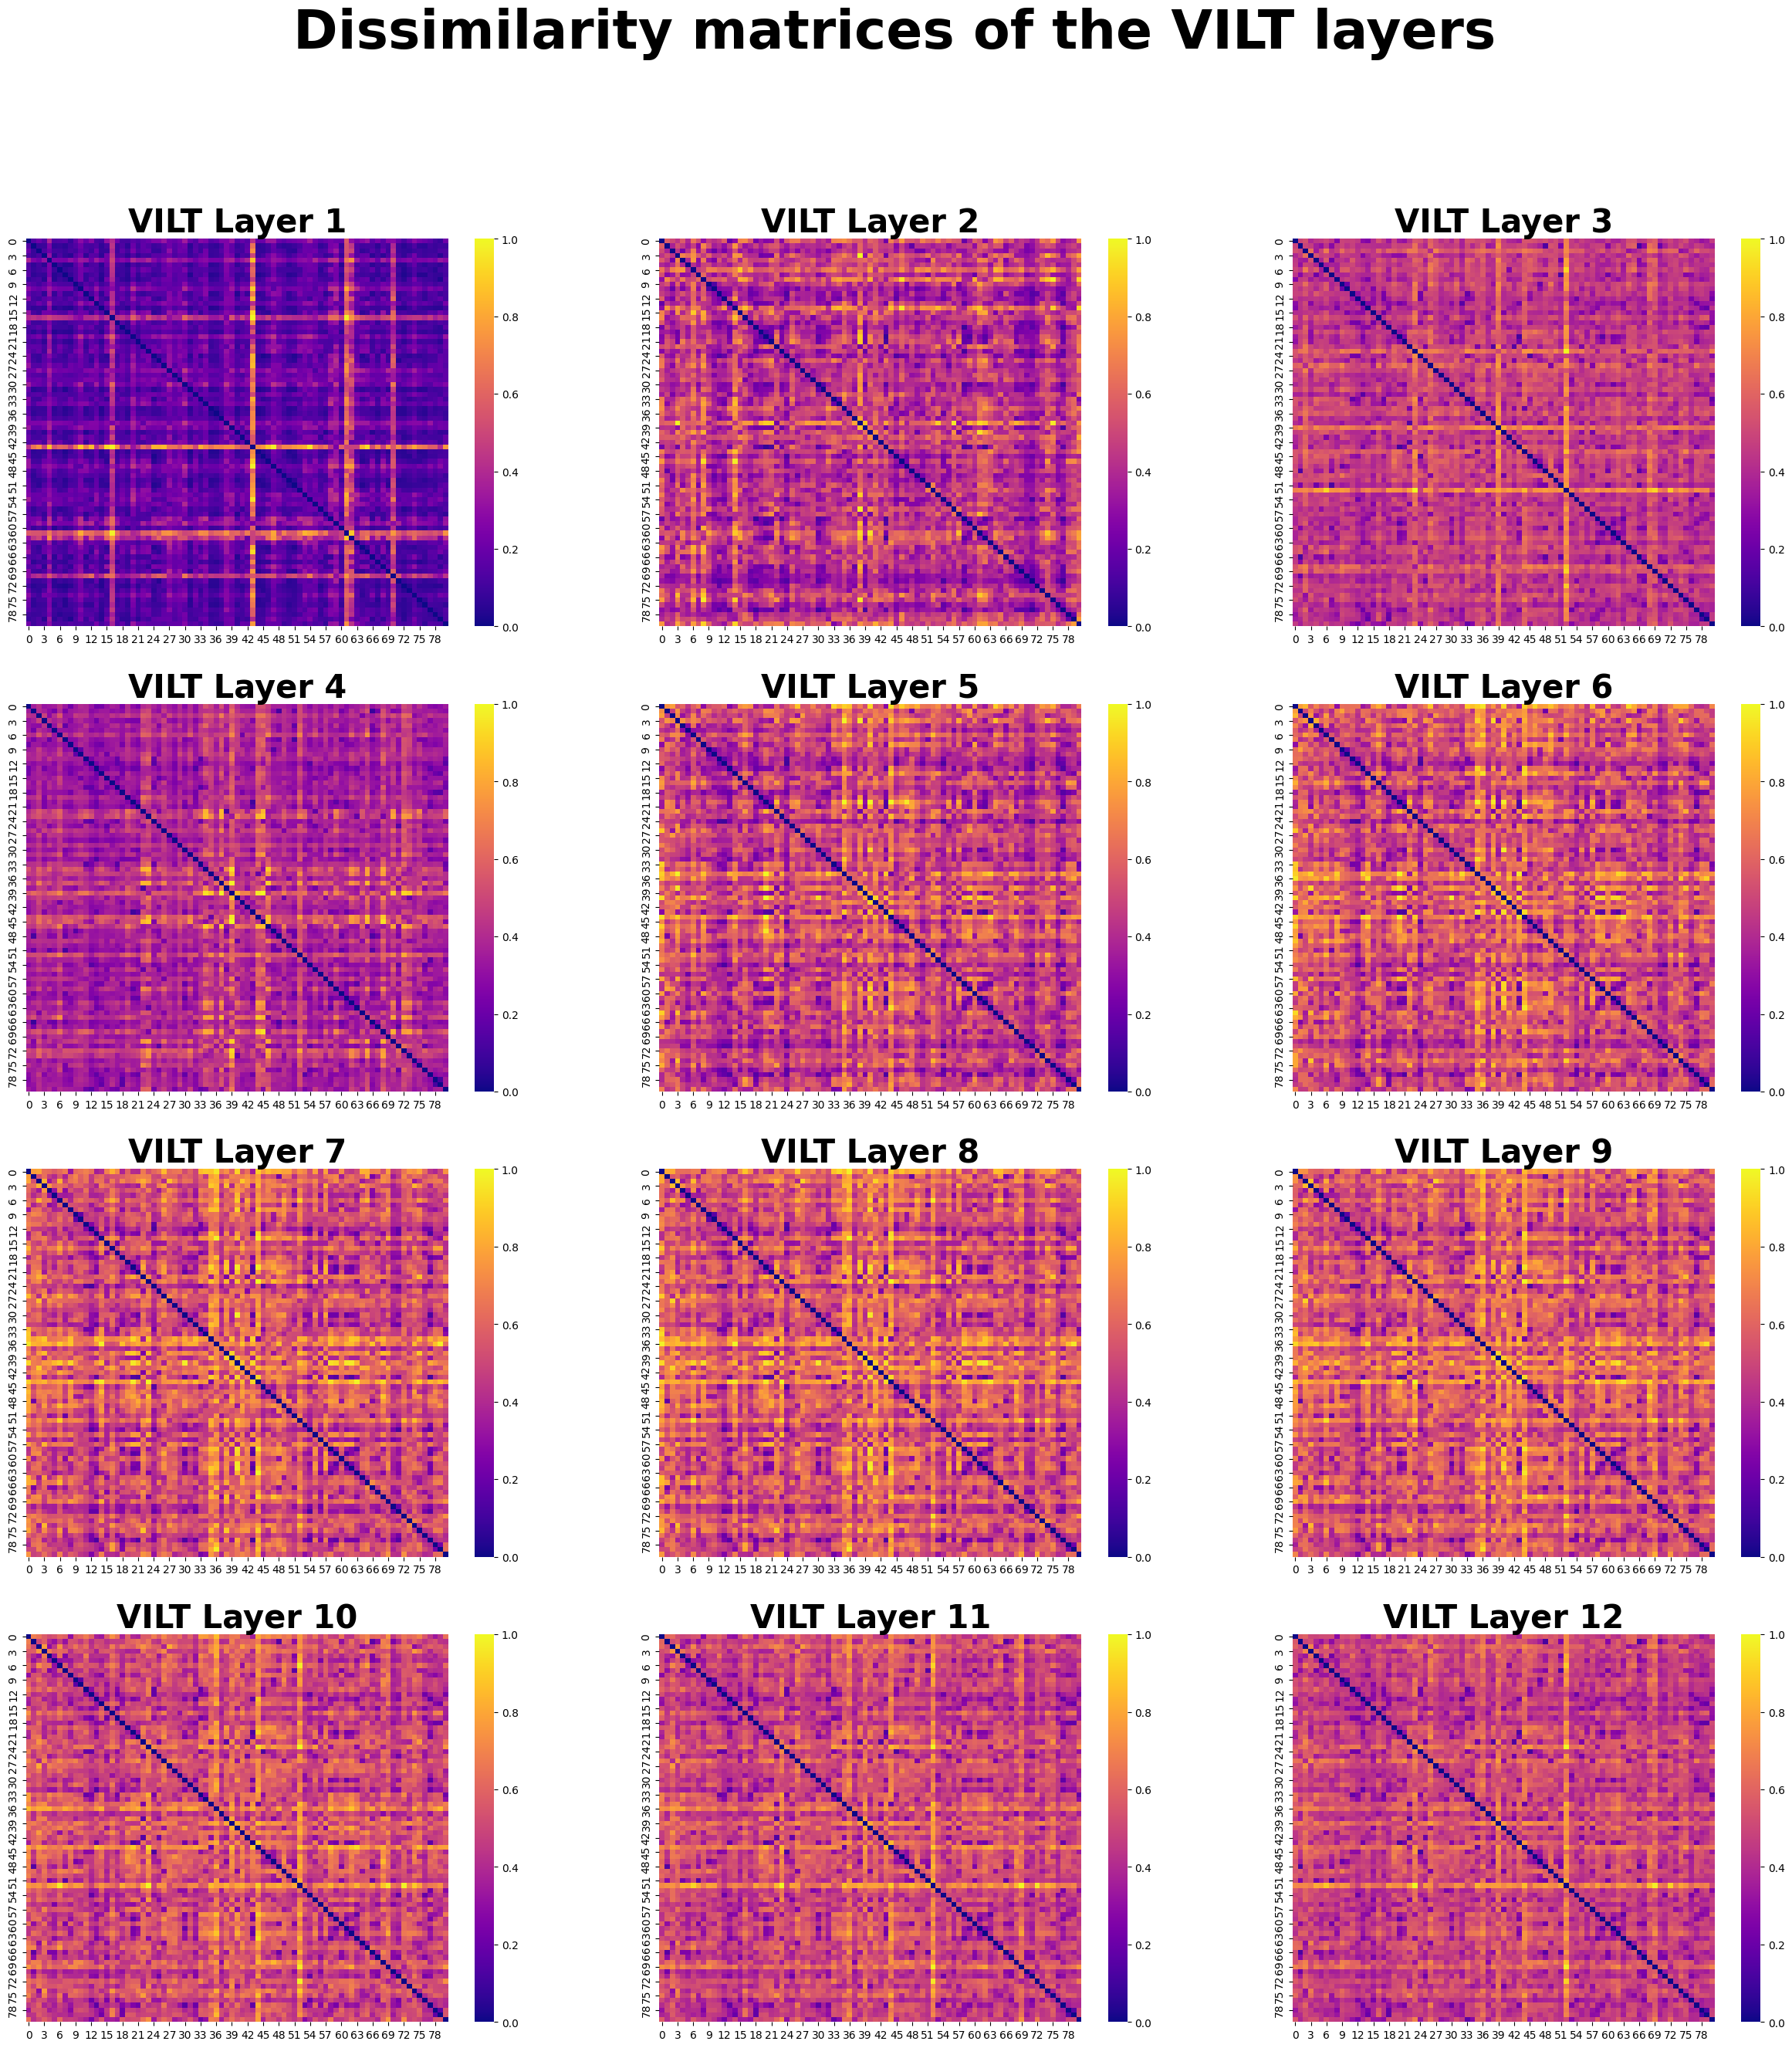

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
fig.suptitle('Dissimilarity matrices of the VILT layers', fontsize=50, fontweight='bold')


plot_rdms(axs, svilt_rdms)

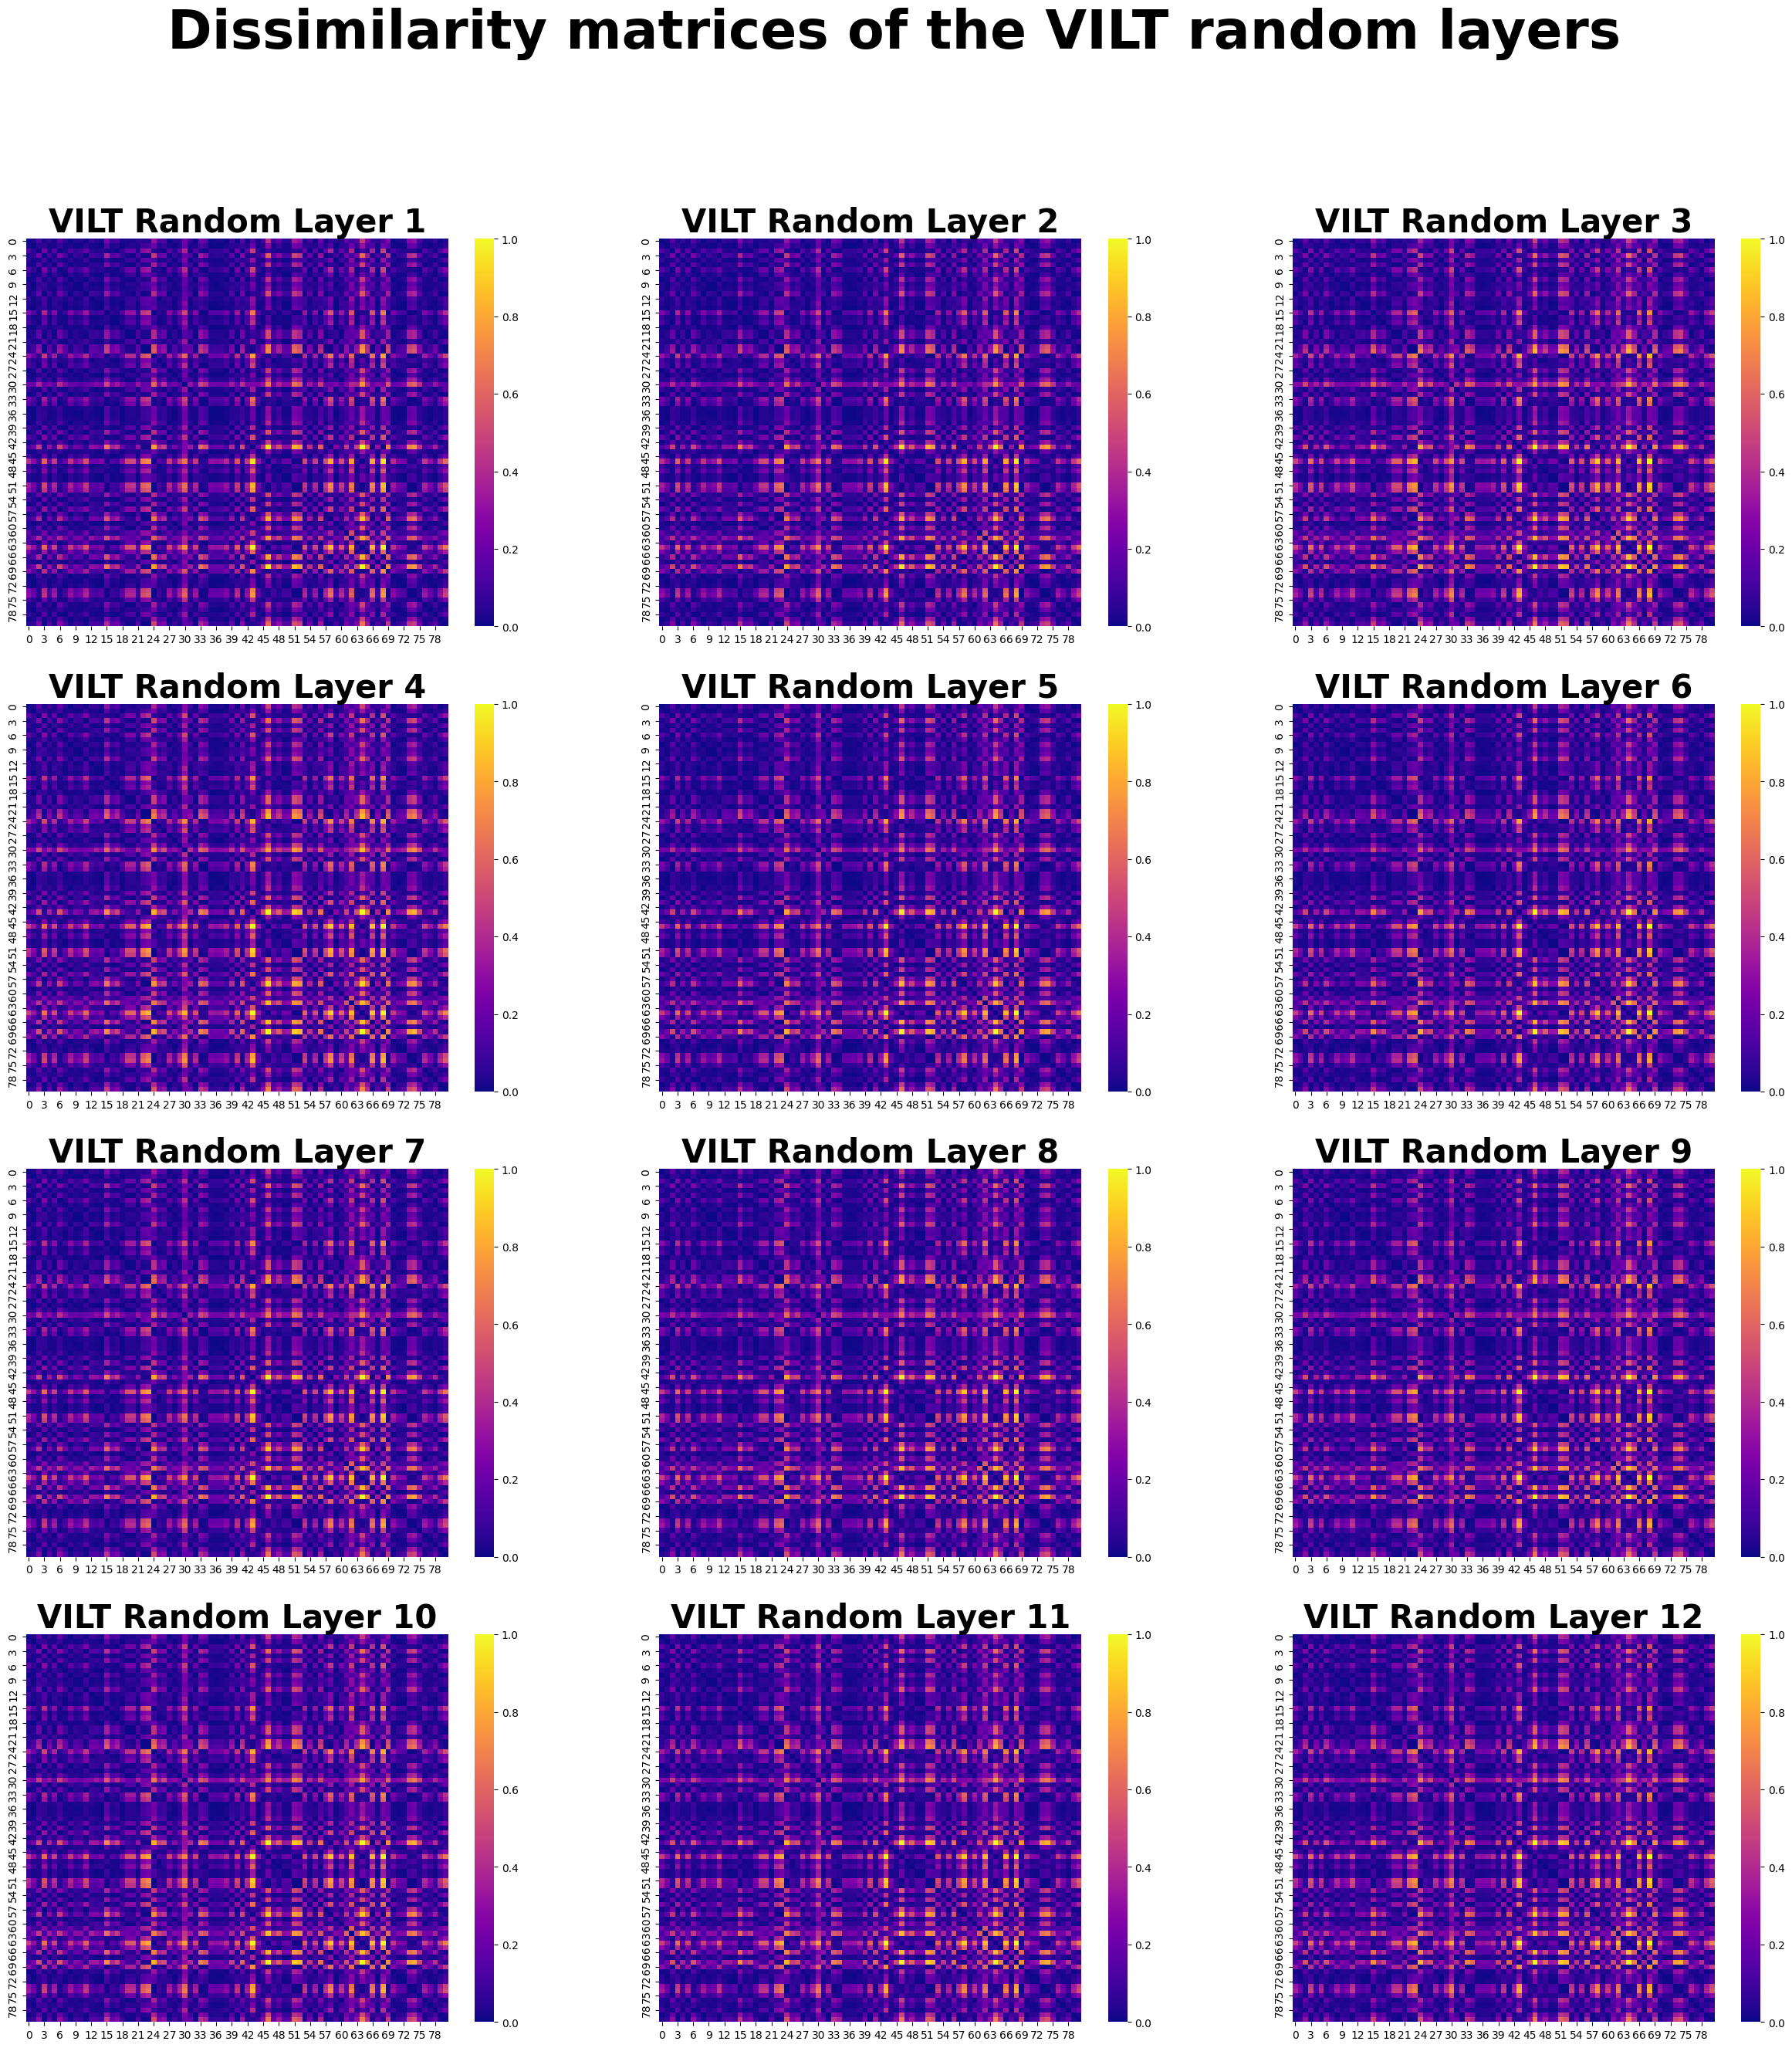

In [5]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
fig.suptitle('Dissimilarity matrices of the VILT random layers', fontsize=50, fontweight='bold')


plot_rdms(axs, svilt_random_rdms)

In [6]:
%store svilt_rdms
%store svilt_random_rdms
%store vilt_multi
%store vilt_random_multi

Stored 'svilt_rdms' (dict)
Stored 'svilt_random_rdms' (dict)
Stored 'vilt_multi' (Tensor)
Stored 'vilt_random_multi' (Tensor)
